### Comparative plot for Vision Zero Code ###
by Richard Sowers

* <r-sowers@illinois.edu>

<https://publish.illinois.edu/r-sowers/>

Copyright 2018 University of Illinois Board of Trustees. All Rights Reserved. Licensed under the MIT license

imports

In [1]:
%matplotlib inline
from matplotlib import pylab as plotter
import pandas
import numpy
import importlib
import MAIN_makeplots_vehmi as makeplots
import pickle
import MAIN_config_hour_of_day_total as config
#import MAIN_config_season as config

External files

In [2]:
dir_names=config.dirnames
curvefigfile="curve_compare_vehmi2.png"
scatterfigfile="scatter_compare_vehmi2.png"

In [3]:
TradeoffDict={}
for d,dirname in enumerate(dir_names):
    dataName=dirname+"/data.p"
    windowname=config.windower(d).name
    dataName=dirname+"/data.p"
    data=pickle.load(open(dataName,"rb"))
    TradeoffDict[windowname]=makeplots.tradeoff(data)

Manhattan whole day


/anaconda3/envs/VZ/lib/python3.6/site-packages/pandas/core/indexes/base.py:162: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return cls.__new__(cls, **d)


Manhattan evening and morning
Manhattan morning rush hour
Manhattan midday
Manhattan evening rush hour


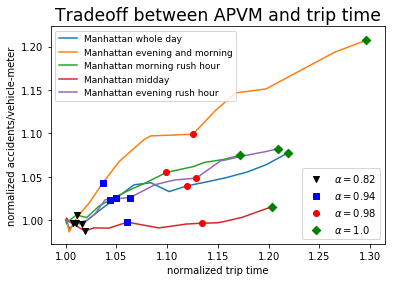

In [5]:
plotter.figure()
for windowname,tradeoff in TradeoffDict.items():
    points=tradeoff.curve()
    l, = plotter.plot(points["rel_time"],points["rel_APVM"],label=windowname,zorder=1)
    s1=plotter.scatter(points["rel_time"].iloc[3],points["rel_APVM"].iloc[3],label=None,marker = 'v',zorder=4,color='black')
    s2=plotter.scatter(points["rel_time"].iloc[6],points["rel_APVM"].iloc[6],label=None,marker = 's',zorder=3,color='blue')
    s3=plotter.scatter(points["rel_time"].iloc[10],points["rel_APVM"].iloc[10],label=None,marker = 'o',zorder=5,color='red')
    s4=plotter.scatter(points["rel_time"].iloc[15],points["rel_APVM"].iloc[15],label=None,marker = 'D',zorder=2,color='green')
#plotter.xlim(1,)
#plotter.ylim(0.9,)
plotter.title("Tradeoff between APVM and trip time",fontsize='xx-large')
plotter.xlabel("normalized trip time",fontsize='medium')
plotter.ylabel("normalized accidents/vehicle-meter",fontsize='medium')
plotter.legend(loc=0,prop={'size':10})
legend2=plotter.legend((s1,s2,s3,s4),('$\\alpha=0.82$','$\\alpha=0.94$','$\\alpha=0.98$','$\\alpha=1.0$'),loc=4)
plotter.legend(prop={'size':9})
plotter.gca().add_artist(legend2)
plotter.savefig(curvefigfile,bbox_inches='tight')
plotter.show()
plotter.close()

In [ ]:
plotter.figure()
for windowname,tradeoff in TradeoffDict.items():
    scatterPoints=tradeoff.avoidancePoints()
    xvals=scatterPoints["trip_time"]
    yvals=scatterPoints["trip_APVM"]
    plotter.scatter(xvals,yvals,label=windowname)
plotter.xlim(1,)
plotter.title("Tradeoff of change in accidents/vehicle-meter and trip time")
plotter.xlabel("relative trip time")
plotter.ylabel("relative accidents/meter")
plotter.legend()
plotter.savefig(scatterfigfile,bbox_inches='tight')
plotter.show()
plotter.close()